# Star Wars Survey

In this project, we will look at data that FiveThirtyEight collected in a survey about Star Wars.

The survey data includes the following information:

- `Have you seen any of the 6 films in the Star Wars franchise?` - Yes or No
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Yes or No
- `Which of the following Star Wars films have you seen? Please select all that apply.`, `Unnamed: 4`, `Unnamed: 5`, `Unnamed: 6`, `Unnamed: 7`, `Unnamed: 8` - Contain the names of the films seen.  If not all six are seen, the columns are completed in the order listed with the remainder left blank.
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`, `Unnamed: 10`, `Unnamed: 11`, `Unnamed: 12`, `Unnamed: 13`, `Unnamed: 14` - Contains the respondent's rankings, from 1 to 6, for the six films, with 1 as the favorite and 6 as the least favorite
- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.`, `Unnamed: 16`, `Unnamed: 17`, `Unnamed: 18`, `Unnamed: 19`, `Unnamed: 20`, `Unnamed: 21`, `Unnamed: 22`, `Unnamed: 23`, `Unnamed: 24`, `Unnamed: 25`, `Unnamed: 26`, `Unnamed: 27`, `Unnamed: 28` - Contains the respondent's view on each of the following characters respectively: Han Solo, Luke Skywalker, Princess Leia Organa, Anakin Skywalker, Obi Wan Kenobi, Emperor Palpatine, Darth Vader, Lando Calrissian, Boba Fett, C-3P0, R2 D2, Jar Jar Binks, Padme Amidala, Yoda
- `Which character shot first?` - Contains the respondent's answer, of either Greedo, Han, or I don't understand this question
- `Are you familiar with the Expanded Universe?` - Yes or No
- `Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦` - Yes or No
- `Do you consider yourself to be a fan of the Star Trek franchise?` - Yes or No
- `RespondentID` - An anonymized ID for the survey respondent
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location

In [1]:
# read in the file
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.shape

(1187, 38)

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
# review the columns included
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Clean Up Column Names

The columns names are very long, and some are not very descriptive, which makes this difficult to work with.  Let's rename these columns to shorter and more useful names.

In [5]:
star_wars.rename(columns={'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any', 
                          'Do you consider yourself to be a fan of the Star Wars film franchise?': 'star_wars_fan',
                          'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                          'Unnamed: 4': 'seen_2',
                          'Unnamed: 5': 'seen_3',
                          'Unnamed: 6': 'seen_4',
                          'Unnamed: 7': 'seen_5',
                          'Unnamed: 8': 'seen_6',
                          'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                          'Unnamed: 10': 'ranking_2',
                          'Unnamed: 11': 'ranking_3',
                          'Unnamed: 12': 'ranking_4',
                          'Unnamed: 13': 'ranking_5',
                          'Unnamed: 14': 'ranking_6',
                          'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'character_han',
                          'Unnamed: 16': 'character_luke',
                          'Unnamed: 17': 'character_leia',
                          'Unnamed: 18': 'character_anakin',
                          'Unnamed: 19': 'character_obi_wan',
                          'Unnamed: 20': 'character_palpatine',
                          'Unnamed: 21': 'character_vader',
                          'Unnamed: 22': 'character_lando',
                          'Unnamed: 23': 'character_boba_fett',
                          'Unnamed: 24': 'character_c3po',
                          'Unnamed: 25': 'character_r2d2',
                          'Unnamed: 26': 'character_jar_jar',
                          'Unnamed: 27': 'character_padme',
                          'Unnamed: 28': 'character_yoda',
                          'Which character shot first?': 'who_shot_first',
                          'Are you familiar with the Expanded Universe?': 'expanded_uni',
                          'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦': 'expanded_uni_fan',
                          'Do you consider yourself to be a fan of the Star Trek franchise?': 'star_trek_fan',
                          'Location (Census Region)': 'location'
                         },
                 inplace=True)

In [6]:
# review the renamed columns
star_wars.columns

Index(['RespondentID', 'seen_any', 'star_wars_fan', 'seen_1', 'seen_2',
       'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2',
       'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'character_han',
       'character_luke', 'character_leia', 'character_anakin',
       'character_obi_wan', 'character_palpatine', 'character_vader',
       'character_lando', 'character_boba_fett', 'character_c3po',
       'character_r2d2', 'character_jar_jar', 'character_padme',
       'character_yoda', 'who_shot_first', 'expanded_uni', 'expanded_uni_fan',
       'star_trek_fan', 'Gender', 'Age', 'Household Income', 'Education',
       'location'],
      dtype='object')

In [7]:
# remove the first row of the data that is not a response, 
# but part of the description of the data fields
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

## Data Cleaning - Yes/No Responses

There are a number of columns that have yes/no answers.  We can more easily work with these if we convert the yes answers to True and the no answers to False.

In [8]:
# review the columns with yes/no answers
yes_no_columns = ['seen_any',
                  'star_wars_fan',
                  'expanded_uni',
                  'expanded_uni_fan',
                  'star_trek_fan'
                 ]

for col in yes_no_columns:
    print(star_wars[col].value_counts(dropna=False))

Yes    936
No     250
Name: seen_any, dtype: int64
Yes    552
NaN    350
No     284
Name: star_wars_fan, dtype: int64
No     615
NaN    358
Yes    213
Name: expanded_uni, dtype: int64
NaN    973
No     114
Yes     99
Name: expanded_uni_fan, dtype: int64
No     641
Yes    427
NaN    118
Name: star_trek_fan, dtype: int64


In [9]:
# convert the Yes/No responses to Boolean types

# create mapping dictionary
yes_no = {'Yes': True, 'No': False}

# map these Yes/No columns
for col in yes_no_columns:
    star_wars[col] = star_wars[col].map(yes_no)

# verify the update occurred as intended
for col in yes_no_columns:
    print(star_wars[col].value_counts(dropna=False))

True     936
False    250
Name: seen_any, dtype: int64
True     552
NaN      350
False    284
Name: star_wars_fan, dtype: int64
False    615
NaN      358
True     213
Name: expanded_uni, dtype: int64
NaN      973
False    114
True      99
Name: expanded_uni_fan, dtype: int64
False    641
True     427
NaN      118
Name: star_trek_fan, dtype: int64


## Data Cleaning - Which Films Seen

For the six columns indicating whether a respondent has seen each of the six films, the current data holds the name of the film seen rather than a yes/no, as with the columns we just dealt with above, or a True/False.

To make these columns easier to work with, let's convert these columns to True if the respondent saw that movie and Fale if they didn't see it or didn't respond.

In [10]:
# confirm that each column only contains the movie name or NaN

films_seen = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

for col in films_seen:
    print(star_wars[col].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64


In [11]:
import numpy as np

# create mapping dictionary to update values
films_seen_map = {'Star Wars: Episode I  The Phantom Menace': True,
                  'Star Wars: Episode II  Attack of the Clones': True,
                  'Star Wars: Episode III  Revenge of the Sith': True,
                  'Star Wars: Episode IV  A New Hope': True,
                  'Star Wars: Episode V The Empire Strikes Back': True,
                  'Star Wars: Episode VI Return of the Jedi': True,
                  np.NaN: False}

# map these columns
for col in films_seen:
    star_wars[col] = star_wars[col].map(films_seen_map)

# verify the update occurred as intended
for col in films_seen:
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


## Data Cleaning - Rankings

For the six rankings columns, where respondents ranked the six movies from most favorite (1) to least favorite (6), we will convert these columns to numeric.  While there are also missing values, there is not much other data cleanup needed on these columns.

In [12]:
# convert to float and confirm it worked as intended
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].dtypes

ranking_1    float64
ranking_2    float64
ranking_3    float64
ranking_4    float64
ranking_5    float64
ranking_6    float64
dtype: object

## Most Favorite Movie

We can now look at the rankings for each of the movies and determine the average ranking for each.  We can visualize the average rankings using a bar chart.  Keep in mind that lower rankings are better (more favorited).

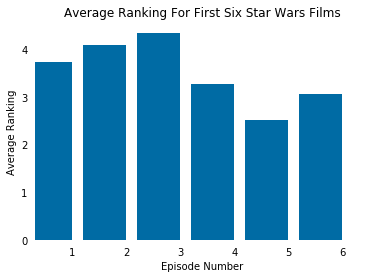

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

cb_dark_blue = (0/255, 107/255, 164/255)
rankings_cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
avg_rankings = [star_wars[col].mean() for col in rankings_cols]

fig, ax = plt.subplots()
ax.bar(np.arange(6)+.6, avg_rankings, color=cb_dark_blue)
ax.set_xlim(0.3, 6.5)
ax.set_yticks(np.arange(0, 5, step=1))
ax.set_ylabel('Average Ranking')
ax.set_xlabel('Episode Number')
ax.set_title('Average Ranking For First Six Star Wars Films')
for key,spine in ax.spines.items():
        spine.set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
plt.show()

From the above graph, we can see that Star Wars: Episode V The Empire Strikes Back is the most favorite movie of the survey respondents. Generally, the original trilogy is rated better than the prequels. which appear to be preferred in the order they came out.

This seems to fit with the common viewpoints on these movies - that the first triology was better than the prequels and that The Empire Strikes Back is the best of the original trilogy.

## Counts of Movies Seen

Given the average rankings shown above, let's look further at how many of the survey respondents saw each of the movies.

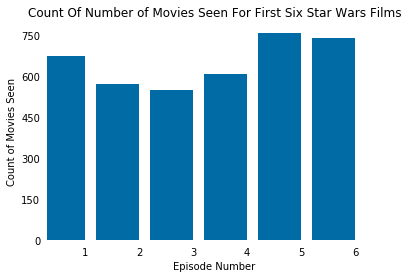

In [14]:
counts_seen = [star_wars[col].sum() for col in films_seen]

fig, ax = plt.subplots()
ax.bar(np.arange(6)+.6, counts_seen, color=cb_dark_blue)
ax.set_xlim(0.3, 6.5)
ax.set_yticks(np.arange(0, 900, step=150))
ax.set_ylabel('Count of Movies Seen')
ax.set_xlabel('Episode Number')
ax.set_title('Count Of Number of Movies Seen For First Six Star Wars Films')
for key,spine in ax.spines.items():
        spine.set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
plt.show()

What is interesting from the above graph is that the two most favorite films, Episodes 5 and 6, also had the most number of survey respondents who saw those movies.  Episodes 2 and 3 were the lowest on the number who saw these movies, which may also help explain the lower rankings we saw above.

We don't know whether the general perception that Episodes 2 and 3 were not as good caused fewer people to see these movies, or if fewer people saw these movies for other reasons but since they didn't see them, they weren't ranked as highly as the others.

## Review Rankings and Movies Seen by Group

We have seen the overall patterns in both overall rankings and in movies seen.  Now let's look a bit more closely at these metrics for different groups within the data.

We will look at how the results may differ between males and females, between self-identified Star Wars fans and not, between self-identified Star Trek fans and not, and between different education levels.

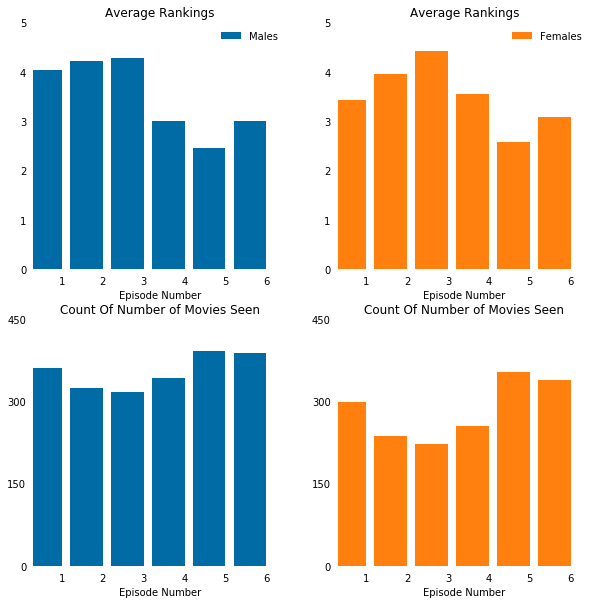

In [15]:
# look at differences between males and females
cb_orange = (255/255, 128/255, 14/255)

males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.bar(np.arange(6)+.6, males[rankings_cols].mean(), color=cb_dark_blue, label='Males')
ax2.bar(np.arange(6)+.6, females[rankings_cols].mean(), color=cb_orange, label='Females')
ax3.bar(np.arange(6)+.6, males[films_seen].sum(), color=cb_dark_blue, label='Males')
ax4.bar(np.arange(6)+.6, females[films_seen].sum(), color=cb_orange, label='Females')

axes = [ax1, ax2, ax3, ax4]
for ax in axes[0:2]:
    ax.set_yticks(np.arange(0, 6, step=1))
    ax.set_title('Average Rankings')
    ax.legend(loc='upper right', frameon=False)
for ax in axes[2:4]:
    ax.set_yticks(np.arange(0, 600, step=150))
    ax.set_title('Count Of Number of Movies Seen')
for ax in axes:
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_xlim(0.3, 6.5)
    ax.set_xlabel('Episode Number')
    
plt.show()

In general, males watched more of the movies than females, especially for the prequels.  However, the overall pattern that The Empire Strikes Back is the most favorite movie still holds.  In addition, the prequels are viewed less than the original triology.

Females seemed to like Episodes 1 and 2 more than males, but there were fewer females who viewed these episodes.  In addition, for females Episode 1 is actually ranked slightly better than Episode 4, while for males Episode 4 is ranked significantly better than Episode 1.

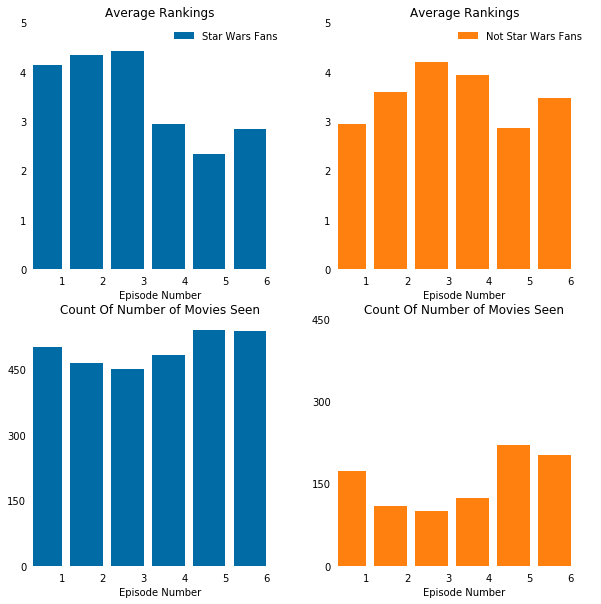

In [16]:
# look at differences between Star Wars fans

star_wars_fans = star_wars[star_wars['star_wars_fan'] == True]
not_star_wars_fans = star_wars[star_wars['star_wars_fan'] != True]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.bar(np.arange(6)+.6, star_wars_fans[rankings_cols].mean(), color=cb_dark_blue, label='Star Wars Fans')
ax2.bar(np.arange(6)+.6, not_star_wars_fans[rankings_cols].mean(), color=cb_orange, label='Not Star Wars Fans')
ax3.bar(np.arange(6)+.6, star_wars_fans[films_seen].sum(), color=cb_dark_blue, label='Star Wars Fans')
ax4.bar(np.arange(6)+.6, not_star_wars_fans[films_seen].sum(), color=cb_orange, label='Not Star Wars Fans')

axes = [ax1, ax2, ax3, ax4]
for ax in axes[0:2]:
    ax.set_yticks(np.arange(0, 6, step=1))
    ax.set_title('Average Rankings')
    ax.legend(loc='upper right', frameon=False)
for ax in axes[2:4]:
    ax.set_yticks(np.arange(0, 600, step=150))
    ax.set_title('Count Of Number of Movies Seen')
for ax in axes:
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_xlim(0.3, 6.5)
    ax.set_xlabel('Episode Number')
    
plt.show()

When comparing Star Wars fans to non-fans, we see that Star Wars fans watched more of the movies than non-fans, which is to be expected.  The pattern for Star Wars fans holds more to the overall pattern we saw before.

For non-fans, we see that The Empire Strikes Back is still preferred, only just slightly over Episode 1 The Phantom Menace.  Episode 3 is the least favorite for both groups.

Interestingly, even for non-fans, the pattern that episodes 5 and 6 were the most watched still holds.

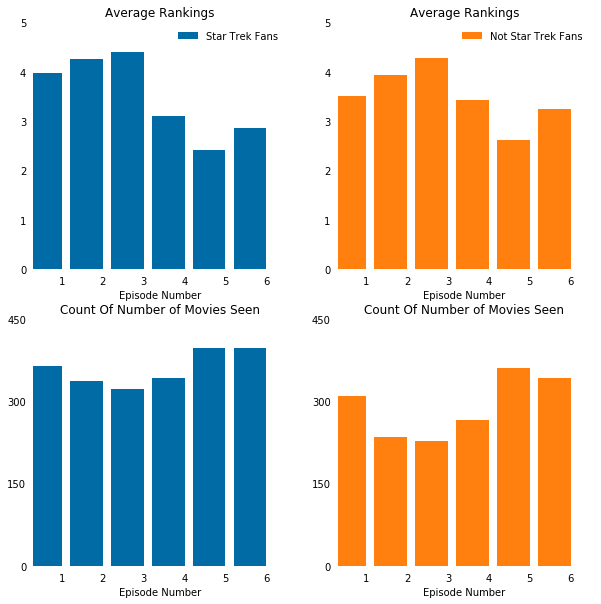

In [17]:
# look at differences between Star Trek fans

star_trek_fans = star_wars[star_wars['star_trek_fan'] == True]
not_star_trek_fans = star_wars[star_wars['star_trek_fan'] != True]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.bar(np.arange(6)+.6, star_trek_fans[rankings_cols].mean(), color=cb_dark_blue, label='Star Trek Fans')
ax2.bar(np.arange(6)+.6, not_star_trek_fans[rankings_cols].mean(), color=cb_orange, label='Not Star Trek Fans')
ax3.bar(np.arange(6)+.6, star_trek_fans[films_seen].sum(), color=cb_dark_blue, label='Star Trek Fans')
ax4.bar(np.arange(6)+.6, not_star_trek_fans[films_seen].sum(), color=cb_orange, label='Not Star Trek Fans')

axes = [ax1, ax2, ax3, ax4]
for ax in axes[0:2]:
    ax.set_yticks(np.arange(0, 6, step=1))
    ax.set_title('Average Rankings')
    ax.legend(loc='upper right', frameon=False)
for ax in axes[2:4]:
    ax.set_yticks(np.arange(0, 600, step=150))
    ax.set_title('Count Of Number of Movies Seen')
for ax in axes:
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_xlim(0.3, 6.5)
    ax.set_xlabel('Episode Number')
    
plt.show()

The differences between Star Trek fans and non-fans is less stark than the differences we looked at above.  Presumably this is because there a Star Wars fans who are also Star Trek fans.

The rankings between Star Trek fans and non-fans are very similar.  However, we do see a general decline in numbers of the movies seen, probably because there are some Star Trek fans who are not Star Wars fans and did not watch the Star Wars movies.

In [18]:
# look at the education variable
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

There are four different categories for `Education` that have enough data that we can look at differences across different levels.  We will look at the following: Graduate degree, Bachelor degree, Some college or Associate degree, High school degree.  I will ignore the NaN values, since we don't know what these are, and the Less than high school degree values, since there are so few of these.

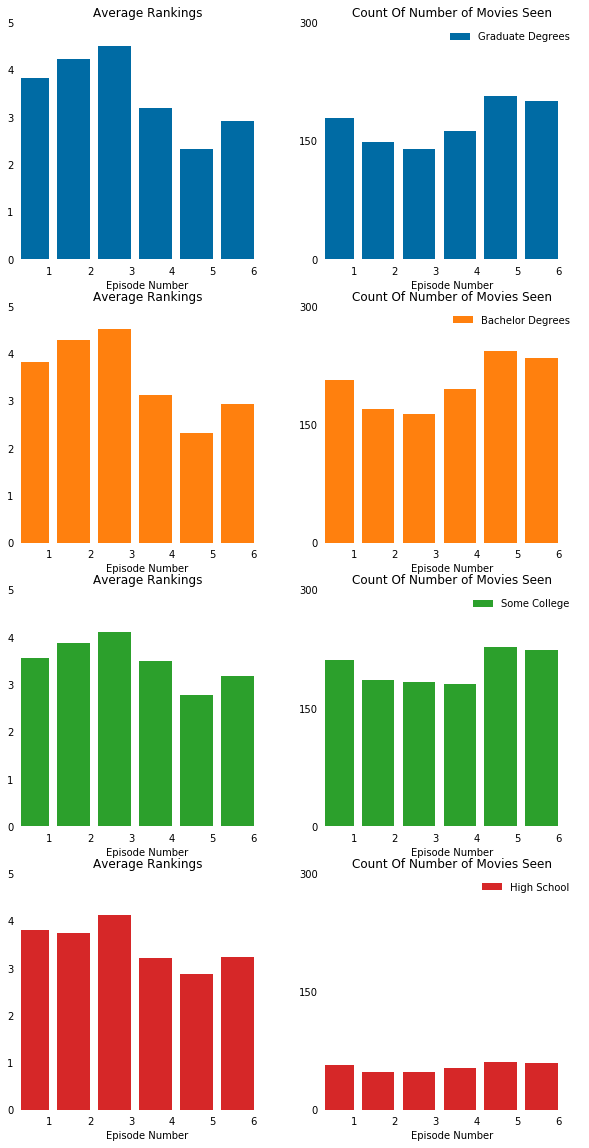

In [19]:
# create the bar graphs for comparisons
tab_green = (44/255, 160/255, 44/255)
tab_red = (214/255, 39/255, 40/255)

educ_grad = star_wars[star_wars['Education'] == 'Graduate degree']
educ_bach = star_wars[star_wars['Education'] == 'Bachelor degree']
educ_coll = star_wars[star_wars['Education'] == 'Some college or Associate degree']
educ_high = star_wars[star_wars['Education'] == 'High school degree']

fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)

ax1.bar(np.arange(6)+.6, educ_grad[rankings_cols].mean(), color=cb_dark_blue, label='Graduate Degrees')
ax2.bar(np.arange(6)+.6, educ_grad[films_seen].sum(), color=cb_dark_blue, label='Graduate Degrees')
ax3.bar(np.arange(6)+.6, educ_bach[rankings_cols].mean(), color=cb_orange, label='Bachelor Degrees')
ax4.bar(np.arange(6)+.6, educ_bach[films_seen].sum(), color=cb_orange, label='Bachelor Degrees')
ax5.bar(np.arange(6)+.6, educ_coll[rankings_cols].mean(), color=tab_green, label='Some College')
ax6.bar(np.arange(6)+.6, educ_coll[films_seen].sum(), color=tab_green, label='Some College')
ax7.bar(np.arange(6)+.6, educ_high[rankings_cols].mean(), color=tab_red, label='High School')
ax8.bar(np.arange(6)+.6, educ_high[films_seen].sum(), color=tab_red, label='High School')

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for ax in [ax1, ax3, ax5, ax7]:
    ax.set_yticks(np.arange(0, 6, step=1))
    ax.set_title('Average Rankings')
for ax in [ax2, ax4, ax6, ax8]:
    ax.set_yticks(np.arange(0, 450, step=150))
    ax.set_title('Count Of Number of Movies Seen')
    ax.legend(loc='upper right', frameon=False)
for ax in axes:
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_xlim(0.3, 6.5)
    ax.set_xlabel('Episode Number')
    
plt.show()

The general pattern that Episode 5 is the most favorite and Episode 3 is the least favorite holds across all Education levels.  However, these effects appear to be stronger in the groups with more education.

Regarding the counts of movies seen, generally Episodes 5 and 6 are the most viewed, which is consistent with the above.  However, for those with only a high school education level, there is relatively little difference in the numbers seen of the different movies.  This may also be due to the low number of responses for this group - it may be harder to see patterns with less data.

## Who Shot First

Who shot first is a controversy in the Star Wars world.  In the original version, it appeared that Han shot Greedo first in the cantina.  However, in the re-release of the movie 20 years later, Greedo shot first and Han retaliated.  This was altered again when the movies went to DVD, so that they fired at about the same time.  Then when the movies were released on Blu-ray, the scene was shortened.

Fans of Han argue that he transforms through the movies from one with shady morals in the beginning to a hero.  We would expect those who are fans of Han Solo to have selected Han as who shot first and have favorable ratings of Han.  It would also be interesting to see if the respondent's age correlated with this in some way.

In [20]:
# look at the who_shot_first variable
star_wars['who_shot_first'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: who_shot_first, dtype: int64

For those who answered the question, there were three possible responses: Han, Greedo, and "I don't understand this question".  Let's look more closely at these groups.

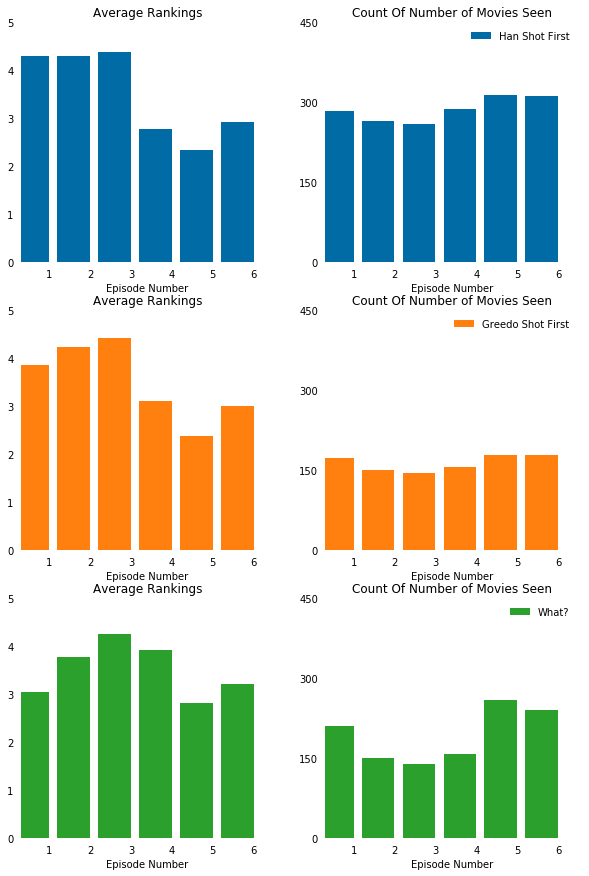

In [21]:
# create the bar graphs for comparisons

first_han = star_wars[star_wars['who_shot_first'] == 'Han']
first_greedo = star_wars[star_wars['who_shot_first'] == 'Greedo']
first_huh = star_wars[star_wars['who_shot_first'] == 'I don\'t understand this question']

fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.bar(np.arange(6)+.6, first_han[rankings_cols].mean(), color=cb_dark_blue, label='Han Shot First')
ax2.bar(np.arange(6)+.6, first_han[films_seen].sum(), color=cb_dark_blue, label='Han Shot First')
ax3.bar(np.arange(6)+.6, first_greedo[rankings_cols].mean(), color=cb_orange, label='Greedo Shot First')
ax4.bar(np.arange(6)+.6, first_greedo[films_seen].sum(), color=cb_orange, label='Greedo Shot First')
ax5.bar(np.arange(6)+.6, first_huh[rankings_cols].mean(), color=tab_green, label='What?')
ax6.bar(np.arange(6)+.6, first_huh[films_seen].sum(), color=tab_green, label='What?')

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax in [ax1, ax3, ax5]:
    ax.set_yticks(np.arange(0, 6, step=1))
    ax.set_title('Average Rankings')
for ax in [ax2, ax4, ax6]:
    ax.set_yticks(np.arange(0, 600, step=150))
    ax.set_title('Count Of Number of Movies Seen')
    ax.legend(loc='upper right', frameon=False)
for ax in axes:
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_xlim(0.3, 6.5)
    ax.set_xlabel('Episode Number')
    
plt.show()

From the above, it appears that while about twice the number of people selected Han as who shot first than Greedo, for the rankings and number of movies seen, both of these groups follow similar patterns to the general patterns we saw above.  Episode 5 is ranked the best, while Episode 3 is ranked the worst.  The original trilogy is ranked higher than the prequels.  Episodes 5 and 6 are viewed more than all of the other episodes.

However, for the group that didn't understand the question, the patterns are a bit different.  In the rankings, Episode 1 ranks almost as well as Episode 5, and we do not see the big difference in the rankings of the original trilogy versus the prequels.

In [22]:
first_han['Age'].unique()

array(['18-29', '30-44', '> 60', '45-60', nan], dtype=object)

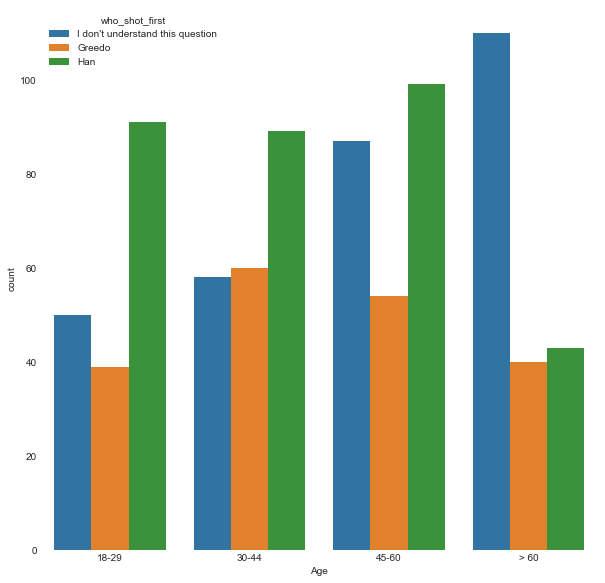

In [23]:
import seaborn as sns
sns.set_style('white')

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='Age', hue='who_shot_first', data=star_wars, 
                   order=['18-29','30-44', '45-60', '> 60'])
sns.despine(left=True, bottom=True)
plt.show()

From the above, we can see that Han generally wins out across the age groups.  However, with older populations, there are many more respondents who do not know what this question is referring to, and in the oldest group, there is almost an even split between Han and Greedo.

In [24]:
favorable = {'Neither favorably nor unfavorably (neutral)': 'Neutral',
             'Very favorably': 'Very favorably',
             'Somewhat favorably': 'Somewhat favorably',
             'Somewhat unfavorably': 'Somewhat unfavorably',
             'Very unfavorably': 'Very unfavorably',
             'Unfamiliar (N/A)': 'Unfamiliar'}

In [25]:
star_wars['character_han'] = star_wars['character_han'].map(favorable)
star_wars['character_han'].unique()

array(['Very favorably', nan, 'Somewhat favorably', 'Neutral',
       'Somewhat unfavorably', 'Unfamiliar', 'Very unfavorably'],
      dtype=object)

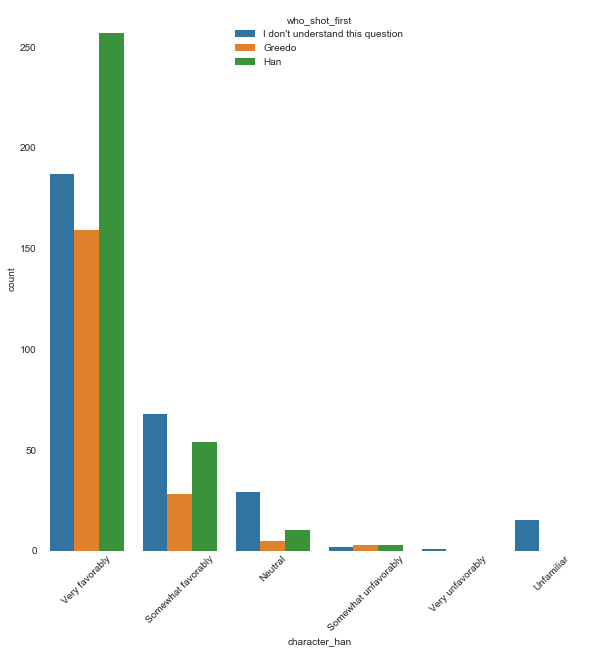

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='character_han', hue='who_shot_first', data=star_wars,
             order=['Very favorably', 'Somewhat favorably', 'Neutral', 'Somewhat unfavorably', 'Very unfavorably', 'Unfamiliar'])
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

Overall, most respondents viewed Han favorably, especially those who believe Han shot first.

## Characters

Finally, let's look at how the characters are viewed by the respondents.  which are viewed most favorably or least favorably?  Which are more controversial and have people on both sides?

In [27]:
# our character columns
characters = ['character_han', 'character_luke', 'character_leia', 'character_anakin',
              'character_obi_wan', 'character_palpatine', 'character_vader',
              'character_lando', 'character_boba_fett', 'character_c3po',
              'character_r2d2', 'character_jar_jar', 'character_padme',
              'character_yoda']

# let's clean up these other character columns
# perform the same mapping we did on all the other characters as we did for Han
for char in characters[1:]:
    star_wars[char] = star_wars[char].map(favorable)

In [28]:
very_favor = pd.DataFrame()
very_unfavor = pd.DataFrame()
for char in characters:
    very_favor[char] = star_wars[char].map({'Very favorably': 1})
    very_unfavor[char] = star_wars[char].map({'Very unfavorably': 1})

In [29]:
very_favor.count()

character_han          610
character_luke         552
character_leia         547
character_anakin       245
character_obi_wan      591
character_palpatine    110
character_vader        310
character_lando        142
character_boba_fett    138
character_c3po         474
character_r2d2         562
character_jar_jar      112
character_padme        168
character_yoda         605
dtype: int64

In [30]:
very_unfavor.count()

character_han            1
character_luke           3
character_leia           6
character_anakin        39
character_obi_wan        7
character_palpatine    124
character_vader        149
character_lando          8
character_boba_fett     45
character_c3po           7
character_r2d2           6
character_jar_jar      204
character_padme         34
character_yoda           8
dtype: int64

From the above tables, the most well liked characters are Han, Luke, Leia, Obi Wan, R2 D2 and Yoda.  The least liked characters are Emperor Palpatine, Darth Vader, and Jar Jar Binks.

What is interesting is that the most disliked characters also have a large number of respondents that viewed them favorably.

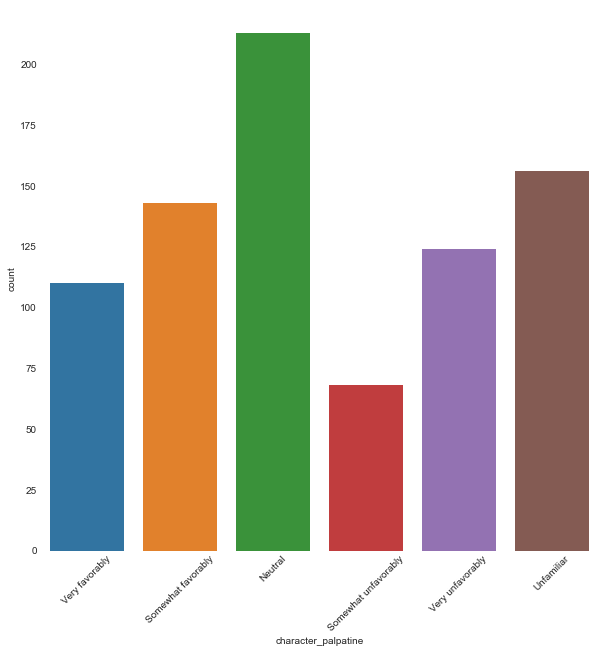

In [31]:
# review character_palpatine more closely
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='character_palpatine', data=star_wars,
             order=['Very favorably', 'Somewhat favorably', 'Neutral', 'Somewhat unfavorably', 'Very unfavorably', 'Unfamiliar'])
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

For Emperor Palpatine, we can see that a lot of respondents either were unfamiliar or were neutral on him, but those who viewed him in one extreme or the other were split pretty evenly.

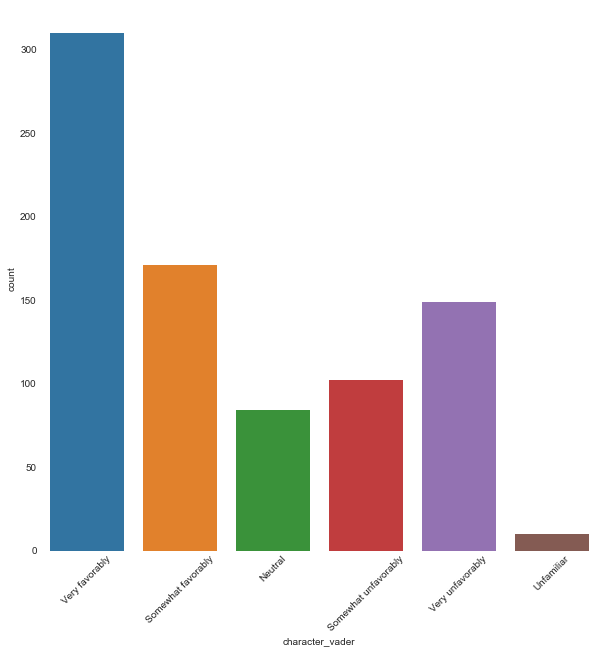

In [32]:
# review character_vader more closely
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='character_vader', data=star_wars,
             order=['Very favorably', 'Somewhat favorably', 'Neutral', 'Somewhat unfavorably', 'Very unfavorably', 'Unfamiliar'])
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

For Darth Vader, there is a different pattern.  Overall, he is viewed favorably, even though he has the second highest count of those that view him very unfavorably.  Most respondents had an opinion on him, and a much smaller number were neutral than with Emperor Palpatine.

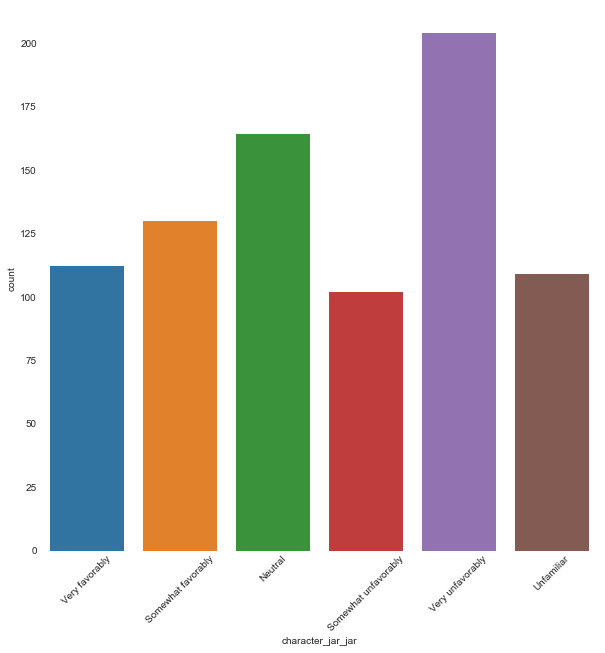

In [33]:
# review character_jar_jar more closely
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='character_jar_jar', data=star_wars,
             order=['Very favorably', 'Somewhat favorably', 'Neutral', 'Somewhat unfavorably', 'Very unfavorably', 'Unfamiliar'])
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

This graph for Jar Jar Binks represents a different pattern of sentiments.  Apart from Emperor Palpatine, this is the only character where the very unfavorable ratings outweigh the very favorable ones.  In this case, the very unfavorable are almost double that of the very favorable.

These findings are in line with general public sentiment that Jar Jar Binks was one of the worst, most annoying characters in the Star Wars universe.  This character was criticized by both fans and critics, and he even received the Worst Supporting Actor award at the Razzie Awards.